In [25]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(tf.keras.__version__)

2.6.0
2.6.0


In [26]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
mnist=tf.keras.datasets.mnist

In [29]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
y_train.shape

(60000,)

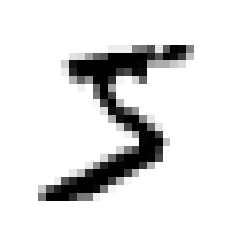

In [32]:
plt.axis("off")
plt.imshow(x_train[0],cmap='binary')

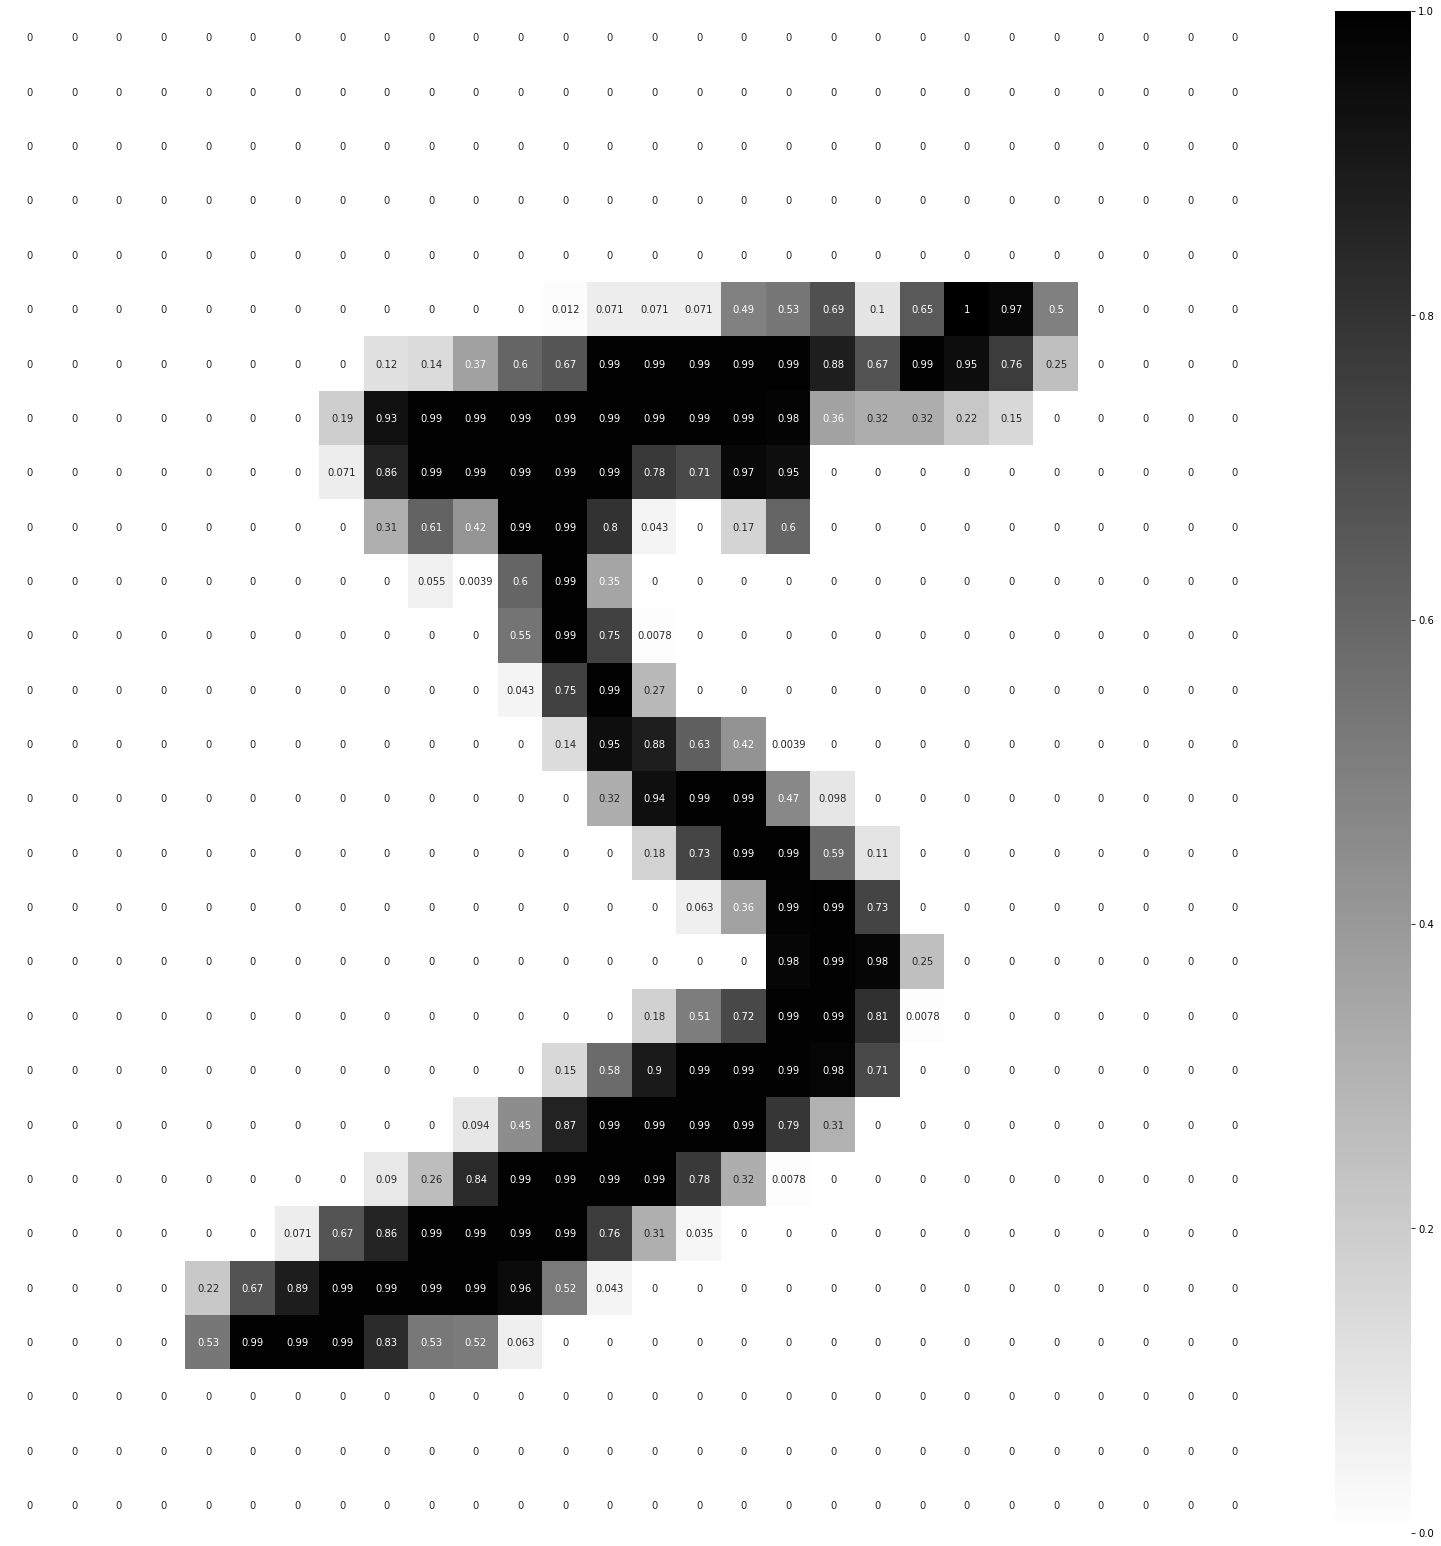

In [33]:
plt.figure(figsize=(28,28))
plt.axis("off")
sns.heatmap(x_train[0]/255.0,cmap='binary',annot=True)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
x_valid,x_train=x_train[0:5000]/255.0,x_train[5000:]/255.0
y_valid,y_train=y_train[0:5000],y_train[5000:]

In [36]:
x_test=x_test/255.0

In [37]:
model=tf.keras.models.Sequential([
                           tf.keras.layers.Flatten(input_shape=[28,28],name='input_layer'),
                           tf.keras.layers.Dense(300,activation='relu',name='hidden_layer1'),
                           tf.keras.layers.Dense(100,activation='relu',name='hidden_layer2'),
                           tf.keras.layers.Dense(10,activation='softmax',name='output_layer')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 300)               235500    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 100)               30100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
loss_function='sparse_categorical_crossentropy'
metrics='accuracy'
optimizer='SGD'

In [39]:
model.compile(loss=loss_function,optimizer=optimizer,metrics=[metrics])

In [40]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6279 - accuracy: 0.8339 - val_loss: 0.3119 - val_accuracy: 0.9156
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2915 - accuracy: 0.9173 - val_loss: 0.2451 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2410 - accuracy: 0.9311 - val_loss: 0.2153 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2066 - accuracy: 0.9410 - val_loss: 0.1835 - val_accuracy: 0.9484
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1801 - accuracy: 0.9483 - val_loss: 0.1633 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1597 - accuracy: 0.9543 - val_loss: 0.1486 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1424 - accuracy: 0.9591 - val_loss: 0.1367 - val_accuracy:

In [41]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9767


[0.07446381449699402, 0.9767000079154968]

In [42]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.627937,0.833909,0.311855,0.9156
1,0.291515,0.917273,0.245102,0.9314
2,0.241037,0.931073,0.215334,0.9436
3,0.206634,0.940964,0.183548,0.9484
4,0.180082,0.948309,0.163285,0.9554
5,0.159707,0.954309,0.148596,0.9598
6,0.142399,0.959055,0.136680,0.9628
7,0.128613,0.963491,0.129399,0.9652
8,0.116771,0.967382,0.116851,0.9672
9,0.106792,0.969891,0.110709,0.9696


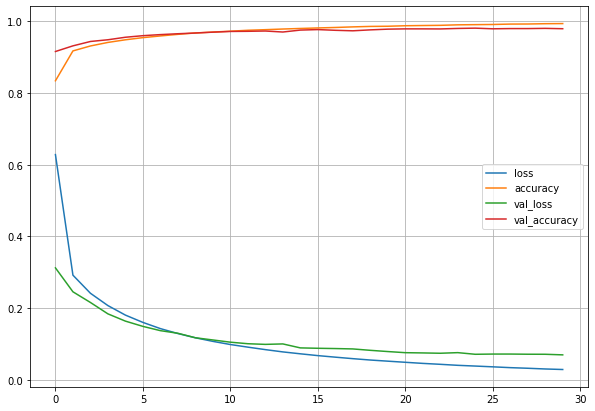

In [45]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [47]:
x_new=x_test[:3]
y=model.predict(x_new)
y.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
y=np.argmax(y,axis=-1)

In [49]:
y

array([7, 2, 1])

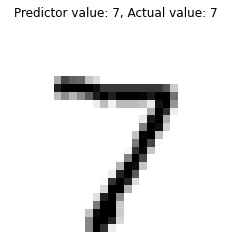

------------------------------------------------------------


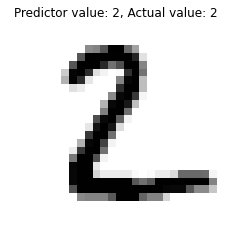

------------------------------------------------------------


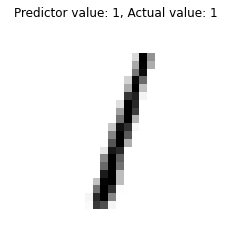

------------------------------------------------------------


In [55]:
for data,pred,actual in zip(x_new,y,y_test[:3]):
  plt.imshow(data,cmap='binary')
  plt.title(f"Predictor value: {pred}, Actual value: {actual}")
  plt.axis("off")
  plt.show()
  print('--'*30)

In [57]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
